<a href="https://colab.research.google.com/github/romajoshi17/Digit-Recognition-Using-NN/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the necessary libraries

In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import random

In [2]:
fig = plt.figure
n_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_classes = 10
epochs = 25

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print("Training data shape {} , test data shape {}".format(X_train.shape, Y_train.shape))


Training data shape (60000, 28, 28) , test data shape (60000,)


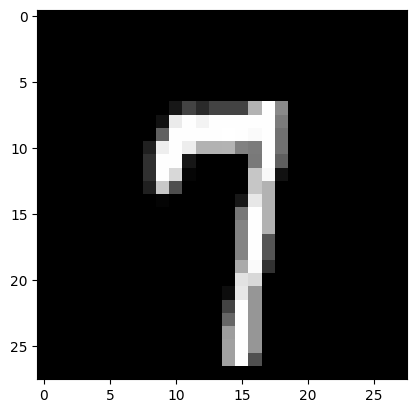

In [5]:
img = X_train[random.randint(0,60000)]
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('train samples ',X_train.shape[0],)
print('test samples',X_test.shape[0])

x_train shape: (60000, 28, 28)
train samples  60000
test samples 10000


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.1402 - loss: 2.2855 - val_accuracy: 0.3653 - val_loss: 2.2097
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2915 - loss: 2.2008 - val_accuracy: 0.5854 - val_loss: 2.1031
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4328 - loss: 2.0976 - val_accuracy: 0.6830 - val_loss: 1.9603
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5263 - loss: 1.9569 - val_accuracy: 0.7234 - val_loss: 1.7676
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5890 - loss: 1.7729 - val_accuracy: 0.7566 - val_loss: 1.5278
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6336 - loss: 1.5501 - val_accuracy: 0.7870 - val_loss: 1.2747
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6651 - loss: 1.3386 - val_accuracy: 0.8090 - val_loss: 1.0553
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6928 - loss: 1.1578 - val_accuracy:

In [9]:
output_score = model.evaluate(X_test, Y_test, verbose=0)
print('Testing loss:', output_score[0])
print('Testing accuracy:', output_score[1])

Testing loss: 0.35222744941711426
Testing accuracy: 0.9035000205039978
